<a href="https://colab.research.google.com/github/LAXMAN7795/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

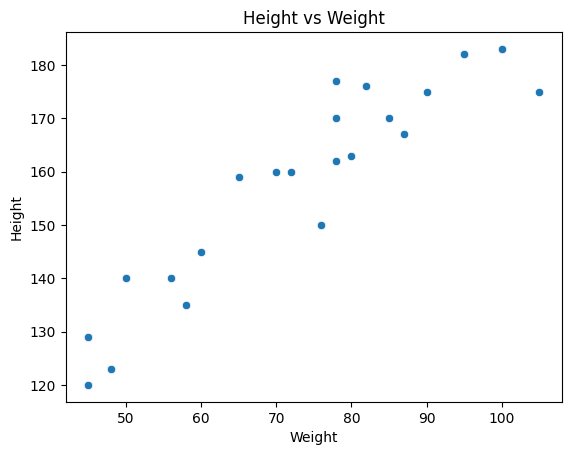

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

In [ ]:
#to find the correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


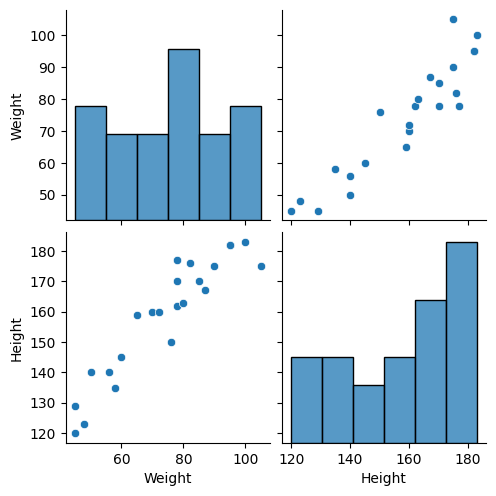

In [ ]:
sns.pairplot(df)

In [ ]:
#Independent and dependent feature
X = df[['Weight']]#independent feature must be dataframe or 2 dimentional array
y = df['Height']#dependent feature can be a series or 1d array

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(17, 1)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)#to convert train data into mean=0 and std=1 using xi-mean/std . here we do fit_transform
X_test_sc = sc.transform(X_test)#here we do transform bcs it is test data

In [ ]:
#apply linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [ ]:
#coeficient or slope. this is B1 value in the y= B0+B1x
lr.coef_ #ans is 17 means 1 unit change in the x axis lead to 17 unit change in the y axis

array([17.2982057])

In [ ]:
#intercept . when we plot the graph best fit line intercept at 156 in y axis
lr.intercept_

np.float64(156.47058823529412)

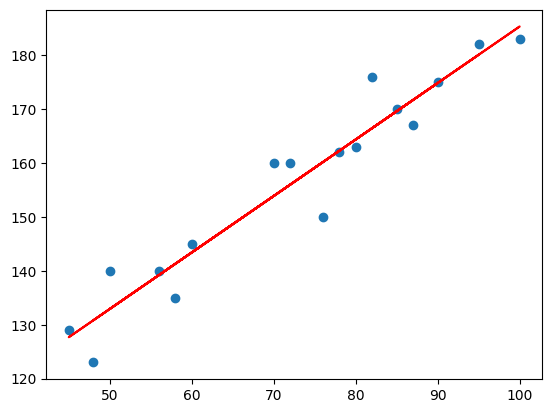

In [ ]:
#plot training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train_sc),color='red')

In [ ]:
#prediction of test data
#predicted height output = intercept +  coeficient(weight)
#                        = 156.4 + 17.29 (X_test)
y_pred = lr.predict(X_test_sc)

In [ ]:
#performance matrix mse,mae,rmse
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 114.84069295228699
mae: 9.66512588679501
rmse: 10.716374991212605


In [ ]:
# performance matrix r sqared
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('r2:',r2)

r2: 0.7360826717981276


In [ ]:
# display adjusted R-sqared
adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2:',adj_r2)

adjusted r2: 0.6701033397476595


In [ ]:
#OLS linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train_sc).fit()
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 20 Apr 2025   Prob (F-statistic):                       0.664
Time:                        16:14:15   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#prediction
prediction = model.predict(X_test_sc)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
#predict for new data
predict = lr.predict(sc.transform([[72]]))
print(predict)

[155.97744705]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
